In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import sklearn
import seaborn as sns

In [2]:
data = pd.read_csv('labels.csv')

In [3]:
#prints the column names present in the csv file
print(data.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [4]:
#prints useful information fron csv file(glimpse of the data in csv file)
print(data.describe())

                 id           age  hypertension  heart_disease  \
count  43400.000000  43400.000000  43400.000000   43400.000000   
mean   36326.142350     42.217894      0.093571       0.047512   
std    21072.134879     22.519649      0.291235       0.212733   
min        1.000000      0.080000      0.000000       0.000000   
25%    18038.500000     24.000000      0.000000       0.000000   
50%    36351.500000     44.000000      0.000000       0.000000   
75%    54514.250000     60.000000      0.000000       0.000000   
max    72943.000000     82.000000      1.000000       1.000000   

       avg_glucose_level           bmi        stroke  
count       43400.000000  41938.000000  43400.000000  
mean          104.482750     28.605038      0.018041  
std            43.111751      7.770020      0.133103  
min            55.000000     10.100000      0.000000  
25%            77.540000     23.200000      0.000000  
50%            91.580000     27.700000      0.000000  
75%           112.07

In [5]:
#prints the number of data present in csv and number of columns in csv file
print(data.shape)

(43400, 12)


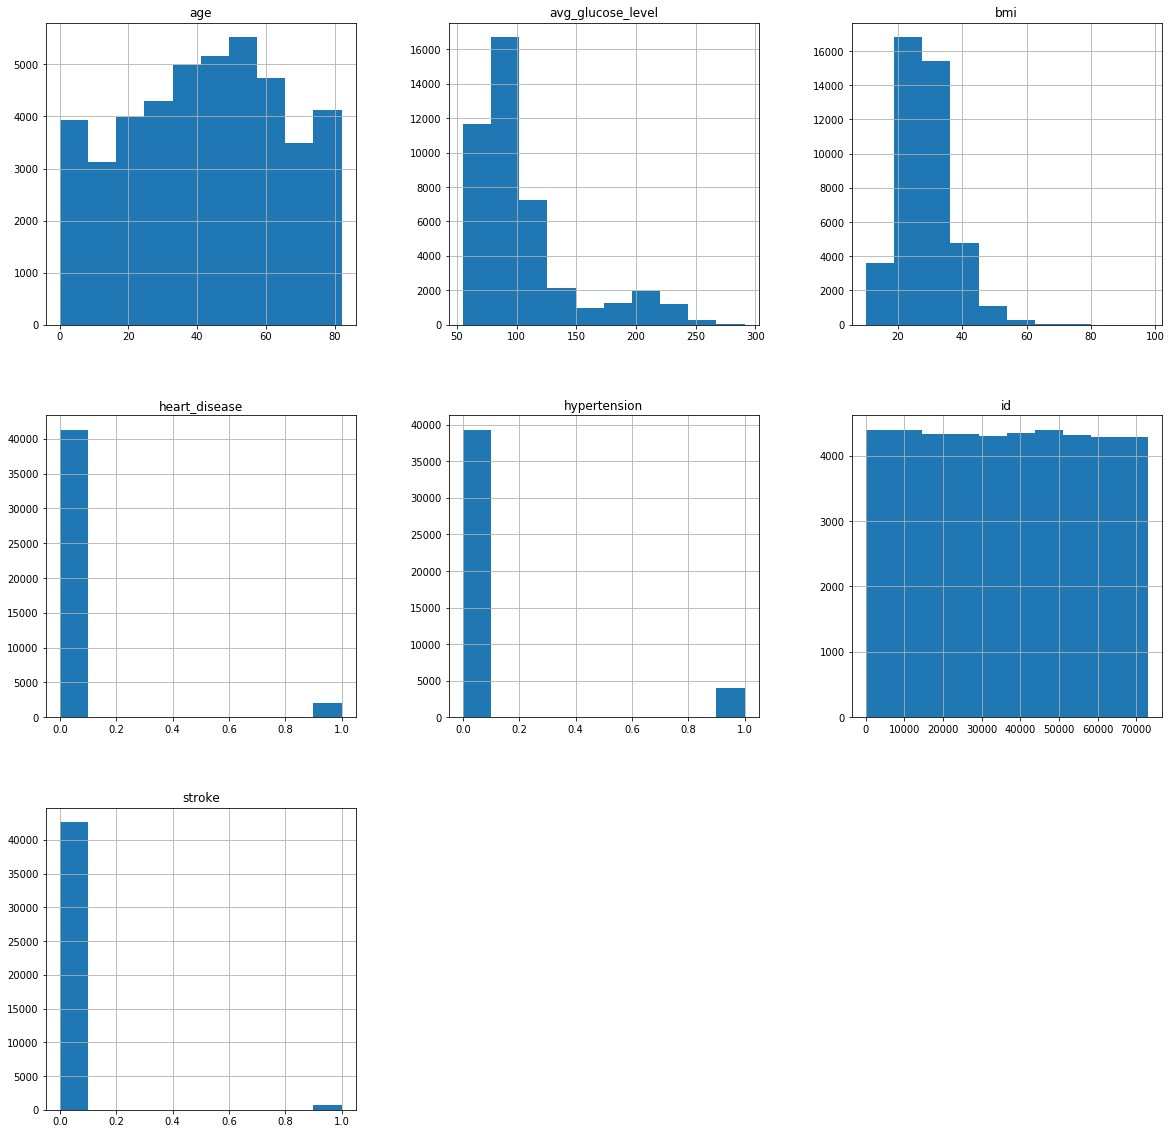

In [6]:
#plotting histogram of the data
data.hist(figsize = (20,20))
plt.show()

In [7]:
#determining the cases of stroke and cases with nostroke
stroke = data[data['stroke'] == 1]
nostroke = data[data['stroke'] == 0]

outlier = len(stroke) / float(len(nostroke))

print(outlier)
print('Stokes:{}'.format(len(stroke)))
print('Non Strokes:{}'.format(len(nostroke)))

0.01837294976183213
Stokes:783
Non Strokes:42617


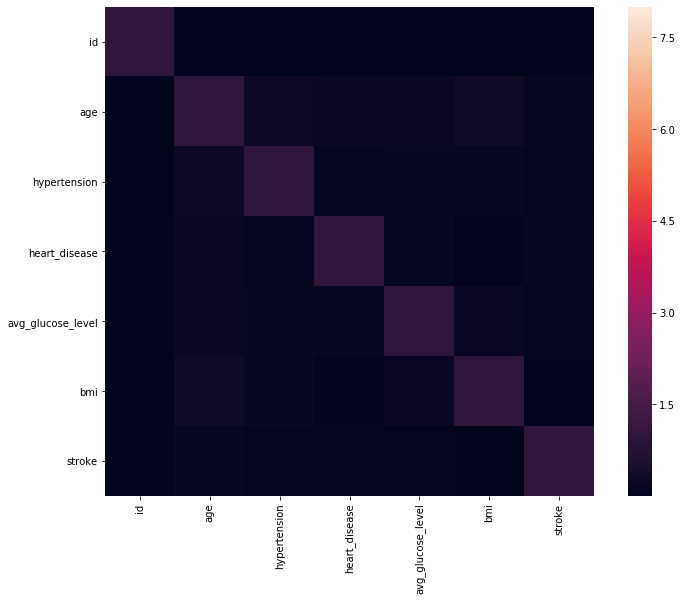

In [8]:
#Correlation Matrix: which features are important for overall classification of the data
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = 8, square = True)
plt.show()

In [9]:
# we are seperating the features from label
#this is the case if you have only single csv file with lable as well as features
#Step 1: put the column data of the csv file into a variable called column
columns = data.columns.tolist()

#Step 2: filter stroke data because we dont want it
columns = [c for c in columns if c not in ["stroke"]]

#Step 3: Store the lable data from csv i.e "stroke" in a variable called target
target = "stroke"

#we need two variables which will help us to create a algorithm to predict strokes from given data
#x is the features from csv file except the stroke result
x = data[columns]
#y is the label i.e stroke result 
y = data[target]

print(x.shape)
print(y.shape)



(43400, 11)
(43400,)


In [10]:
#import the anamoly detection packages from sklearn
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [11]:
#creating outliers
#create a random state
state = 1

#define outlier detection methods inside a dictionary
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(x),
                                       contamination = outlier,
                                       random_state=state),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors = 20,
                                             contamination = outlier)
}

In [13]:
#fitting the model

#define an outlier because we will be using it many times
n_outliers = len(stroke)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    #fit data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(x)
        scores_pred = clf.negative_outlier_factor_
        
    else:
        #convert dataframe into float or else you will get error
        data_convert = float(pd.DataFrame(data))
        
        
        clf.fit(x)
        scores_pred = clf.decision_function(x)
        y_pred = clf.predict(x)
            
            
       #reshape prediciton values 0 for nostroke & 1 for stroke
        y_pred[y_pred==1] = 0
        y_pred[y_pred == -1] = 1    
        n_errors = (y_pred != y).sum()
            
        #run the classification metrix
        print("{} : {}".format(clf_name, n_errors))
        print(accuracy_score(y, y_pred))
        print(classification_report(y, y_pred))



C:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


ValueError: could not convert string to float: 'Male'